【問題1】1次関数

In [51]:
import numpy as np


x = np.arange(-50.0, 50.1, 0.1, dtype = "float64")

y_array = []

for i in range(x.size):
    y_array.append(1 / 2 * x[i] + 1)
    
y = np.array(y_array)
print(x.shape)
print(y.shape)

array([-24.  , -23.95, -23.9 , ...,  25.9 ,  25.95,  26.  ])

(1001,)
(1001,)


【問題2】配列の結合

In [37]:
xy = np.stack([x, y], 1)
print(xy.shape)

(1001, 2)


【問題3】勾配を求める

In [59]:
d_a = (y[1:] - y[:-1])/(x[1:] - x[:-1])
print(d_a.size)

1000


【問題4】グラフを描く

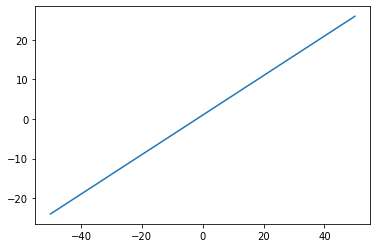

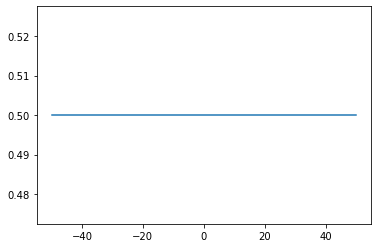

In [62]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(x, y)
plt.show()

plt.plot(x[1:], d_a)
plt.show()

【問題5】Pythonの関数化

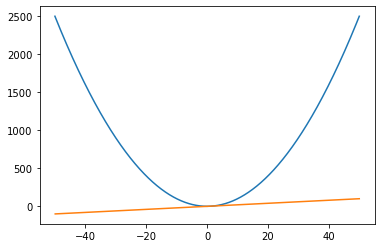

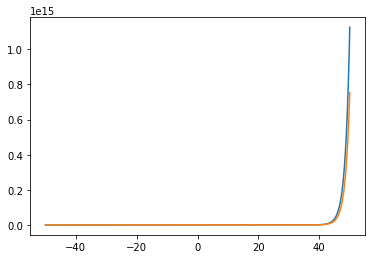

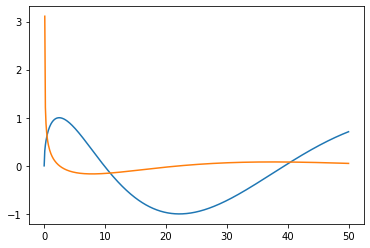

In [92]:
import matplotlib.pyplot as plt
import numpy as np


# y = x**2
x_1 = np.arange(-50.0, 50.1, 0.1, dtype = "float64")
y_1 = x**2 #np.array([ x**2 for i in x ])
d_a_1 = (y[1:] - y[:-1])/(x[1:] - x[:-1])

plt.plot(x_1,y_1)
plt.plot(x[1:], d_a_1)
plt.show()

# y = 2*x**2 + 2**x
x_2 = np.arange(-50.0, 50.1, 0.1, dtype = "float64")
y_2 = (2*(x_2**2) + 2**x)
d_a_2 = (y_2[1:] - y_2[:-1])/(x_2[1:] - x_2[:-1])

plt.plot(x_2,y_2)
plt.plot(x[1:], d_a_2)
plt.show()

# y = sin(1/x**1/2)
x_3 = np.arange(0.0, 50.1, 0.1, dtype = "float64")
#y_3 = np.sin(x_3**0.5)
y_3 = np.sin(x_3**(1/2))
d_a_3 = (y_3[1:] - y_3[:-1])/(x_3[1:] - x_3[:-1])

plt.plot(x_3,y_3)
plt.plot(x_3[1:], d_a_3)
plt.show()

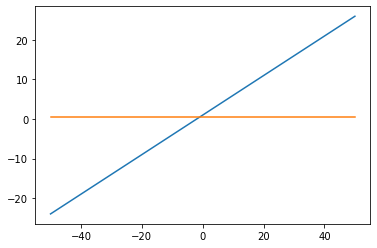

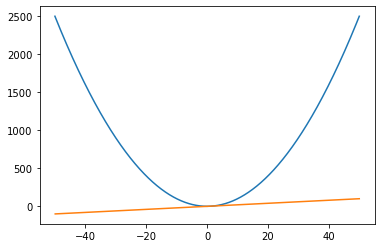

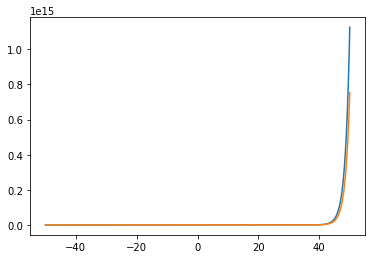

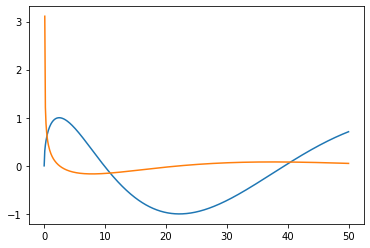

In [145]:
import matplotlib.pyplot as plt
import numpy as np


def compute_gradient(function, x=np.arange(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。
    Parameters
    ----------------
    function : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    y = function(x)
    array_xy = np.stack([x, y], 1)
    d_a = (y[1:] - y[:-1])/(x[1:] - x[:-1])
    return array_xy, d_a


def function1(x):
    y = np.array([ i/2 +1 for i in x ])
    return y

def function2(x):
    y = x**2
    return y

def function3(x):
    y = (2*(x_2**2) + 2**x)
    return y

def function4(x):
    y = np.sin(x_3**(1/2))
    return y

array_xy, d_a = compute_gradient(function1)
x = array_xy[:, 0]
y = array_xy[:, 1]
plt.plot(x, y)
plt.plot(x[1:], d_a)
plt.show()

array_xy, d_a = compute_gradient(function2)
x = array_xy[:, 0]
y = array_xy[:, 1]
plt.plot(x, y)
plt.plot(x[1:], d_a)
plt.show()

array_xy, d_a = compute_gradient(function3)
x = array_xy[:, 0]
y = array_xy[:, 1]
plt.plot(x, y)
plt.plot(x[1:], d_a)
plt.show()

array_xy, d_a = compute_gradient(function4, x=np.arange(0.0, 50.1, 0.1))
x = array_xy[:, 0]
y = array_xy[:, 1]
plt.plot(x, y)
plt.plot(x[1:], d_a)
plt.show()

【問題6】最小値を求める

In [156]:
import numpy as np


def compute_gradient(function, x=np.arange(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。
    Parameters
    ----------------
    function : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    y = function(x)
    array_xy = np.stack([x, y], 1)
    d_a = (y[1:] - y[:-1])/(x[1:] - x[:-1])
    return array_xy, d_a


def function1(x):
    y = np.array([ i/2 +1 for i in x ])
    return y

def function2(x):
    y = x**2
    return y

def function3(x):
    y = (2*(x_2**2) + 2**x)
    return y

def function4(x):
    y = np.sin(x_3**(1/2))
    return y

array_xy, d_a = compute_gradient(function1)
x = array_xy[:, 0]
y = array_xy[:, 1]

y_min = min(y)
y_argmin = y[np.argmin(y)]

print(f"function1の最小値後の勾配{d_a[np.argmin(y) + 1]}")
print(f"function1の最小値前の勾配{d_a[np.argmin(y) - 1]}")

array_xy, d_a = compute_gradient(function2)
x = array_xy[:, 0]
y = array_xy[:, 1]

y_min = min(y)
y_argmin = y[np.argmin(y)]

print(f"function2の最小値後の勾配{d_a[np.argmin(y) + 1]}")
print(f"function2の最小値前の勾配{d_a[np.argmin(y) - 1]}")

array_xy, d_a = compute_gradient(function3)
x = array_xy[:, 0]
y = array_xy[:, 1]

y_min = min(y)
y_argmin = y[np.argmin(y)]

print(f"function3の最小値後の勾配{d_a[np.argmin(y) + 1]}")
print(f"function3の最小値前の勾配{d_a[np.argmin(y) - 1]}")

array_xy, d_a = compute_gradient(function4, x=np.arange(0.0, 50.1, 0.1))
x = array_xy[:, 0]
y = array_xy[:, 1]

y_min = min(y)
y_argmin = y[np.argmin(y)]

print(f"function4の最小値後の勾配{d_a[np.argmin(y) + 1]}")
print(f"function4の最小値前の勾配{d_a[np.argmin(y) - 1]}")


function1の最小値後の勾配0.5
function1の最小値前の勾配0.5
function2の最小値後の勾配0.30000000000142535
function2の最小値前の勾配-0.09999999999858034
function3の最小値後の勾配0.4696700846350943
function3の最小値前の勾配-0.4170183305979998
function4の最小値後の勾配0.0016061158921243152
function4の最小値前の勾配-0.0006388422559544435
